<a href="https://colab.research.google.com/github/namozhdehi/Pathrise/blob/main/02_Data_Wrangling_Pathrise_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load Data](#2.4_Load)
  * [2.5 Data Cleaning & Preprocessing](#2.5_Cleaning)
    * [2.5.1 Text Cleaning](#2.5.1_Text_Cleaning)
    * [2.5.2 Handling Missing Values](#2.5.2_Missing)
  * [2.6 Explore The Data](#2.6_Explore)
    * [2.6.1 Class Distribution](#2.5.1_Distribution)
    * [2.6.2 Word Cloud for Conversations](#2.6.2_WordCloud)  
  * [2.7 Handling Class Imbalance](#2.7_Imbalance)
  * [2.8 Data Splitting](#2.8_Splitting)
  * [2.9 Saving the Cleaned Data](#2.9_Save)
  * [2.10 Summary](#2.10_Summary)

## 2.2 Introduction<a id='2.2_Introduction'></a>

This project focuses on building a chatbot to provide career guidance based on the Pathrise dataset. The data wrangling process includes cleaning, transforming, and preparing the conversation data for training a chatbot model. We will explore class distributions, handle data imbalances, and ensure proper preprocessing of the textual data. The final output will be a clean dataset, ready for chatbot training.

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from imblearn.over_sampling import SMOTE
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2.4 Load Data <a id='2.4_Load'></a>

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_excel('Data_Pathrise.xlsx')  # Replace with the actual file path
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


## 2.5 Data Cleaning & Preprocessing <a id='2.5_Cleaning'></a>

### 2.5.1 Text Cleaning <a id='2.5.1_Text_Cleaning'></a>

Clean the text to remove unwanted characters, stopwords, and make the text consistent.

In [3]:
import re

# Define a function to clean the conversation text
def clean_text(text):
    # Check if the input is a string; if not, return an empty string
    if not isinstance(text, str):
        return ''

    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply the clean_text function to the 'biggest_challenge_in_search' column
df['cleaned_text'] = df['biggest_challenge_in_search'].apply(clean_text)

### 2.5.2 Handling Missing Values <a id='2.5.2_Missing'></a>

Check and handle any missing values in the dataset.

In [4]:
# Check for missing values
print(df.isnull().sum())

# Optionally, drop rows with missing values
df.dropna(inplace=True)

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
cleaned_text                     0
dtype: int64


## 2.6 Explore The Data <a id='2.6_Explore'></a>

### 2.6.1 Class Distribution <a id='2.6.1_Distribution'></a>

Visualize the distribution of classes (labels) in the dataset.

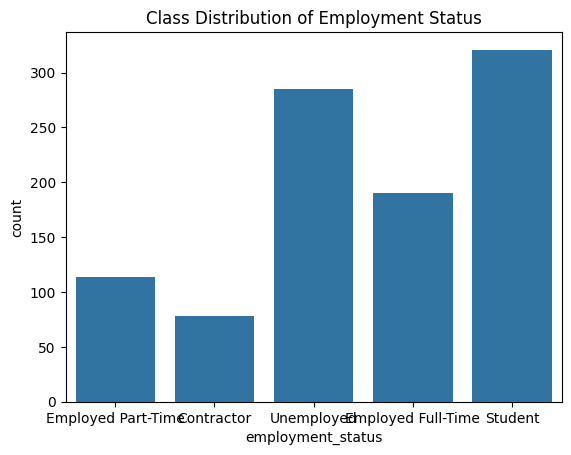

In [5]:
# Strip leading and trailing spaces from all column names
df.columns = df.columns.str.strip()

# Now plot the class distribution
sns.countplot(x='employment_status', data=df)
plt.title('Class Distribution of Employment Status')
plt.show()

### 2.6.2 Word Cloud for Conversations <a id='2.6.2_WordCloud'></a>

Generate a word cloud to visualize frequent words in the conversations.

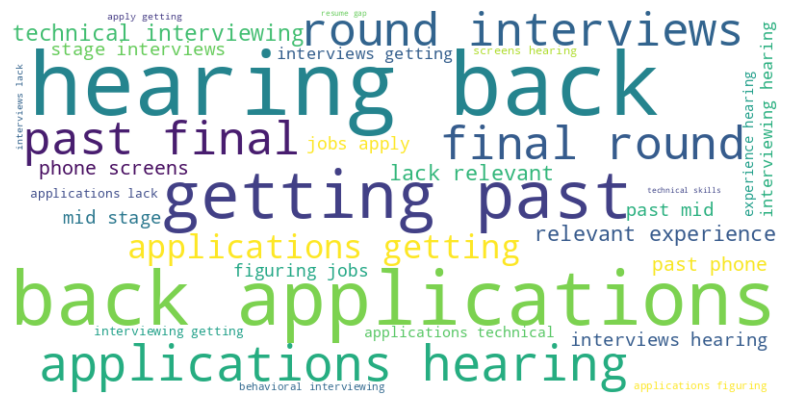

In [6]:
# Create a word cloud
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2.7 Handling Class Imbalance <a id='2.7_Imbalance'></a>

If the class distribution is imbalanced, apply SMOTE to oversample the minority class.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into numerical form using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features based on your dataset size
X_tfidf = tfidf.fit_transform(df['cleaned_text'])  # Replace 'cleaned_text' with the correct column name

# Convert X_tfidf to a dense format, as SMOTE may not work with sparse matrices
X_tfidf_dense = X_tfidf.toarray()

# Apply SMOTE to handle class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_tfidf_dense, df['employment_status'])  # Replace with the correct label column

## 2.8 Data Splitting <a id='2.8_Splitting'></a>

Split the dataset into training and testing sets for chatbot training.

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print sizes of the splits
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 1284
Test set size: 321


## 2.9 Saving the Cleaned Data <a id='2.9_Save'></a>

Save the cleaned and preprocessed dataset for future use in model training.

In [9]:
# Create a final DataFrame with resampled features and labels
df_final = pd.DataFrame(X_resampled, columns=tfidf.get_feature_names_out())  # Use the correct feature names from TF-IDF
df_final['employment_status'] = y_resampled  # Add the label column

# Save the DataFrame to a CSV file
df_final.to_csv('pathrise_cleaned_data.csv', index=False)

## 2.10 Summary <a id='2.10_Summary'></a>

In this notebook, we extracted, cleaned, and explored the Pathrise Conversations dataset. We handled missing values, cleaned the text data, addressed class imbalance using SMOTE, and split the data for training and testing. The final output is a cleaned dataset ready for training the Pathrise Conversations chatbot.